<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Probabilidad y estadística

</center></font></h1>
<h2><font color='0B5345'> <center>
Caso aplicado: Regresión Logística</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

La regresión logística es un algoritmo de aprendizaje supervisado que se emplea para predecir observaciones dentro de un conjunto específico de clases discretas. 

En la práctica, se utiliza para asignar observaciones a diferentes categorías, lo que implica que su salida es de naturaleza discreta. La regresión logística representa uno de los algoritmos de clasificación más simples y versátiles que se utilizan en la resolución de problemas de clasificación.

### Definición

El algoritmo de regresión logística funciona implementando una ecuación lineal con variables independientes o explicativas para predecir un valor de respuesta. 

Consideremos el ejemplo de número de horas estudiadas y probabilidad de aprobar el examen. Aquí, el número de horas estudiadas es la variable explicativa y se denota por x1. La probabilidad de aprobar el examen es la variable de respuesta o objetivo y se denota por y.


</center></font></h1>
<h2><font color='0B5345'> <center>
Y = β0 + β1x1</center></font></h2>
<font  face="Courier New" size="3">

Entonces β0 y β1 son los parámetros del modelo.

### Función sigmoidea

El valor de respuesta predicho, denotado por y, luego se convierte en un valor de probabilidad que se encuentra entre 0 y 1. Usamos la función sigmoidea para asignar valores predichos a valores de probabilidad. Esta función sigmoidea luego asigna cualquier valor real a un valor de probabilidad entre 0 y 1.

En el aprendizaje automático, la función sigmoidea se utiliza para asignar predicciones a probabilidades. La función sigmoidea tiene una curva en forma de S. 
<p align="center">
  <img src="https://jacar.es/wp-content/uploads/2023/03/FuncionSigmoide.png" alt="Función Sigmoidea">
</p>



### Supuestos

1. El modelo de regresión logística requiere que la variable dependiente sea de naturaleza binaria, multinomial u ordinal.

2. Requiere que las observaciones sean independientes entre sí. Por tanto, las observaciones no deberían provenir de mediciones repetidas.

3. El éxito del modelo de regresión logística depende del tamaño de la muestra. Normalmente, se requiere un tamaño de muestra grande para lograr una alta precisión.

4. No hay valores atípicos en los predictores continuos (variables independientes).

5. No hay correlaciones fuertes entre las variables independientes (predictoras)

### Ejemplo

Se tiene un conjunto de datos compuesto por mediciones diagnósticas de mujeres de al menos 21 años para predecir si tienen diabetes o no.

Las variables disponibles en el dataset son las siguientes:

- Embarazos: Número de veces que está embarazada
- Glucosa: Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa.
- Presión arterial: presión arterial diastólica (mm Hg)
- Grosor de la piel: Grosor del pliegue cutáneo del tríceps (mm)
- Insulina: insulina sérica de 2 horas (mu U/ml)
- IMC: índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Medida que evalúa la predisposición hereditaria a la diabetes tipo 2 en individuos basándose en la historia familiar de la enfermedad.
- Edad: Edad (años)
- Resultado: variable de clase (0 o 1)

### Análisis exploratorio

In [31]:
# Importar librerías para visualización y gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para generar el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [32]:
data = pd.read_csv("diabetes.csv",sep=";")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
print(f'El números de registros y variables es {data.shape}')

El números de registros y variables es (768, 9)


### Limpieza de datos

In [34]:
## Verificación de filas o columnas vacias
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Análisis descriptivo

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [36]:
print('Coeficiente de asimetría:\n',data.skew())
print('-------------------------------------------------')
print('Coeficiente de curtosis:\n',data.kurt())

Coeficiente de asimetría:
 Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64
-------------------------------------------------
Coeficiente de curtosis:
 Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


### Distribuciones de probabilidad

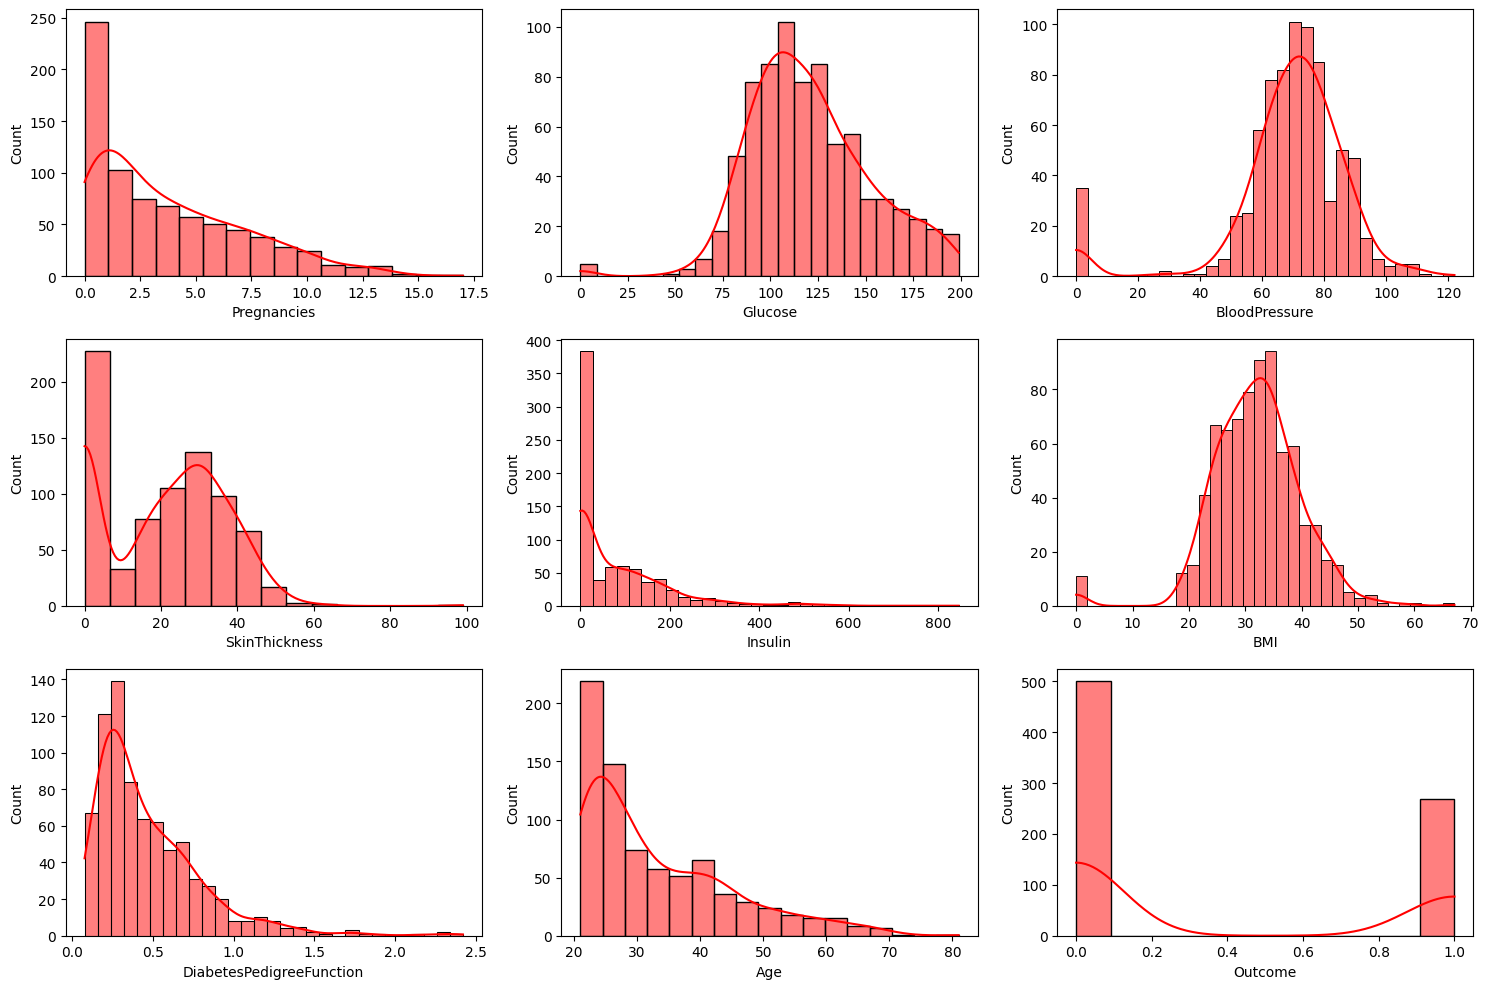

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

columnas = data.columns.tolist()

for i, columna in enumerate(columnas):
    fila = i // 3
    col = i % 3
    sns.histplot(data[columna], kde = True,color='r',ax=axes[fila, col])
plt.tight_layout()

plt.show()


### Tratamiento de valores en cero

In [38]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna Glucose son 5
Numero de observaciones menores o iguales a cero en la columna BloodPressure son 35
Numero de observaciones menores o iguales a cero en la columna SkinThickness son 227
Numero de observaciones menores o iguales a cero en la columna Insulin son 374
Numero de observaciones menores o iguales a cero en la columna BMI son 11


No tiene sentido que  estas variables tengan valores en cero, sin embargo no se quiere perder estos datos, una opción es reemplazar los valores en cero por la mediana de esa variables.

In [39]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    median = data[col].median()
    data.loc[data[col]<=0,col] = median

C:\Users\jjcor\AppData\Local\Temp\ipykernel_2292\2010756985.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col]<=0,col] = median


In [40]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna Glucose son 0
Numero de observaciones menores o iguales a cero en la columna BloodPressure son 0
Numero de observaciones menores o iguales a cero en la columna SkinThickness son 0
Numero de observaciones menores o iguales a cero en la columna Insulin son 0
Numero de observaciones menores o iguales a cero en la columna BMI son 0


### Detección de datos atípicos

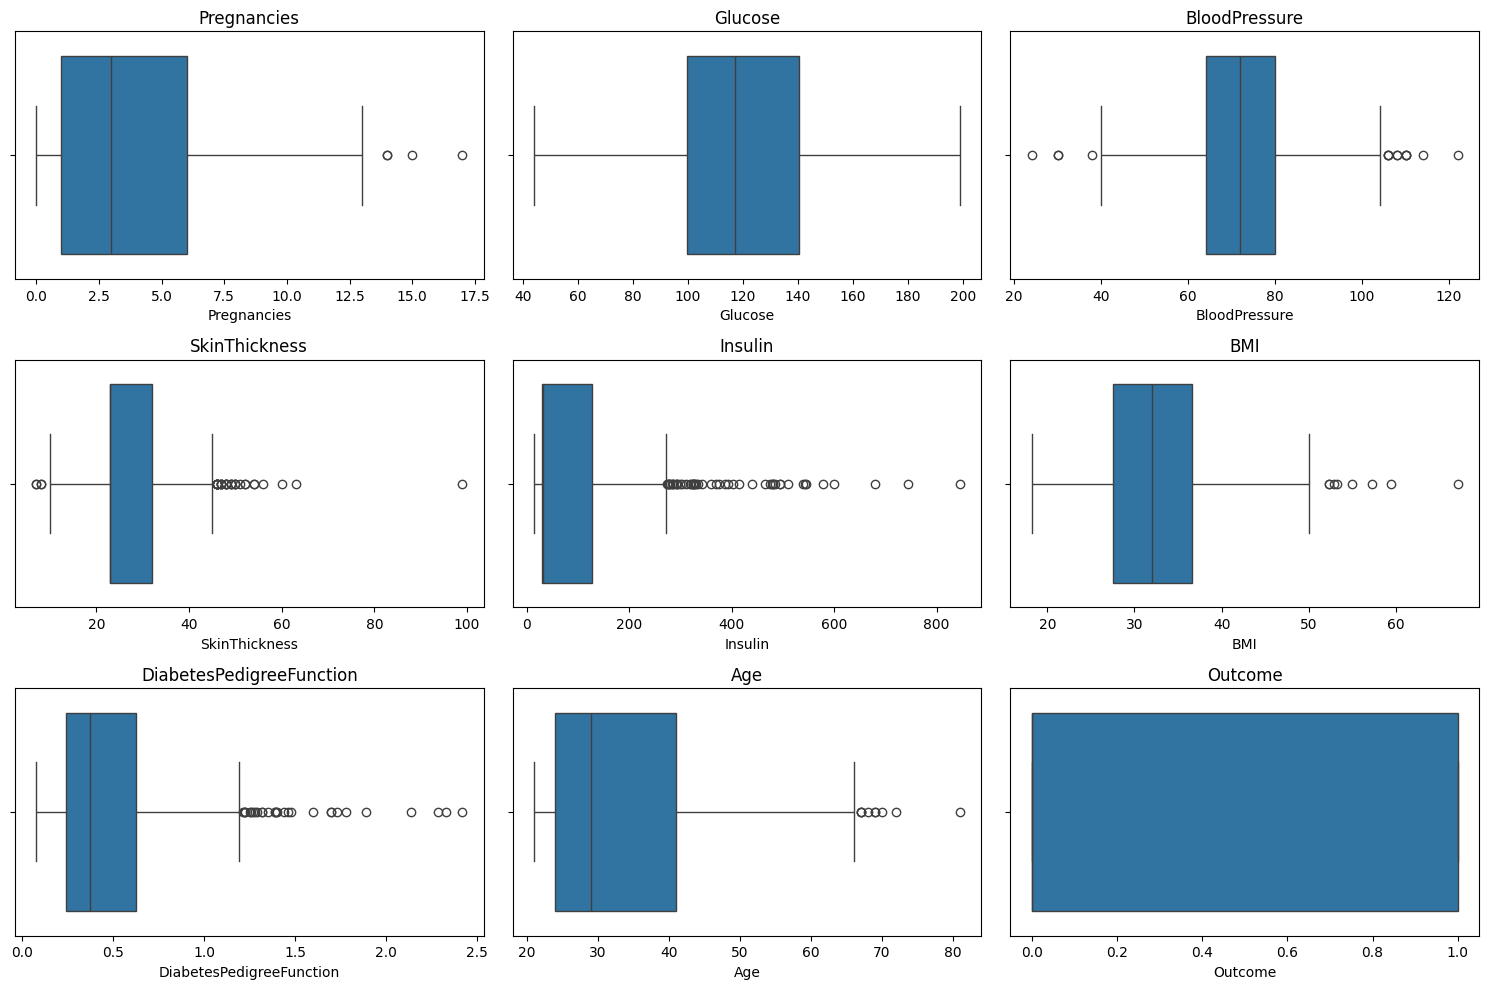

In [41]:
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [42]:
outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']

##### Función para eliminar datos atípicos

In [43]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [44]:
for i in data.columns:
    data[i]=remove_outliers_iqr(data[i])

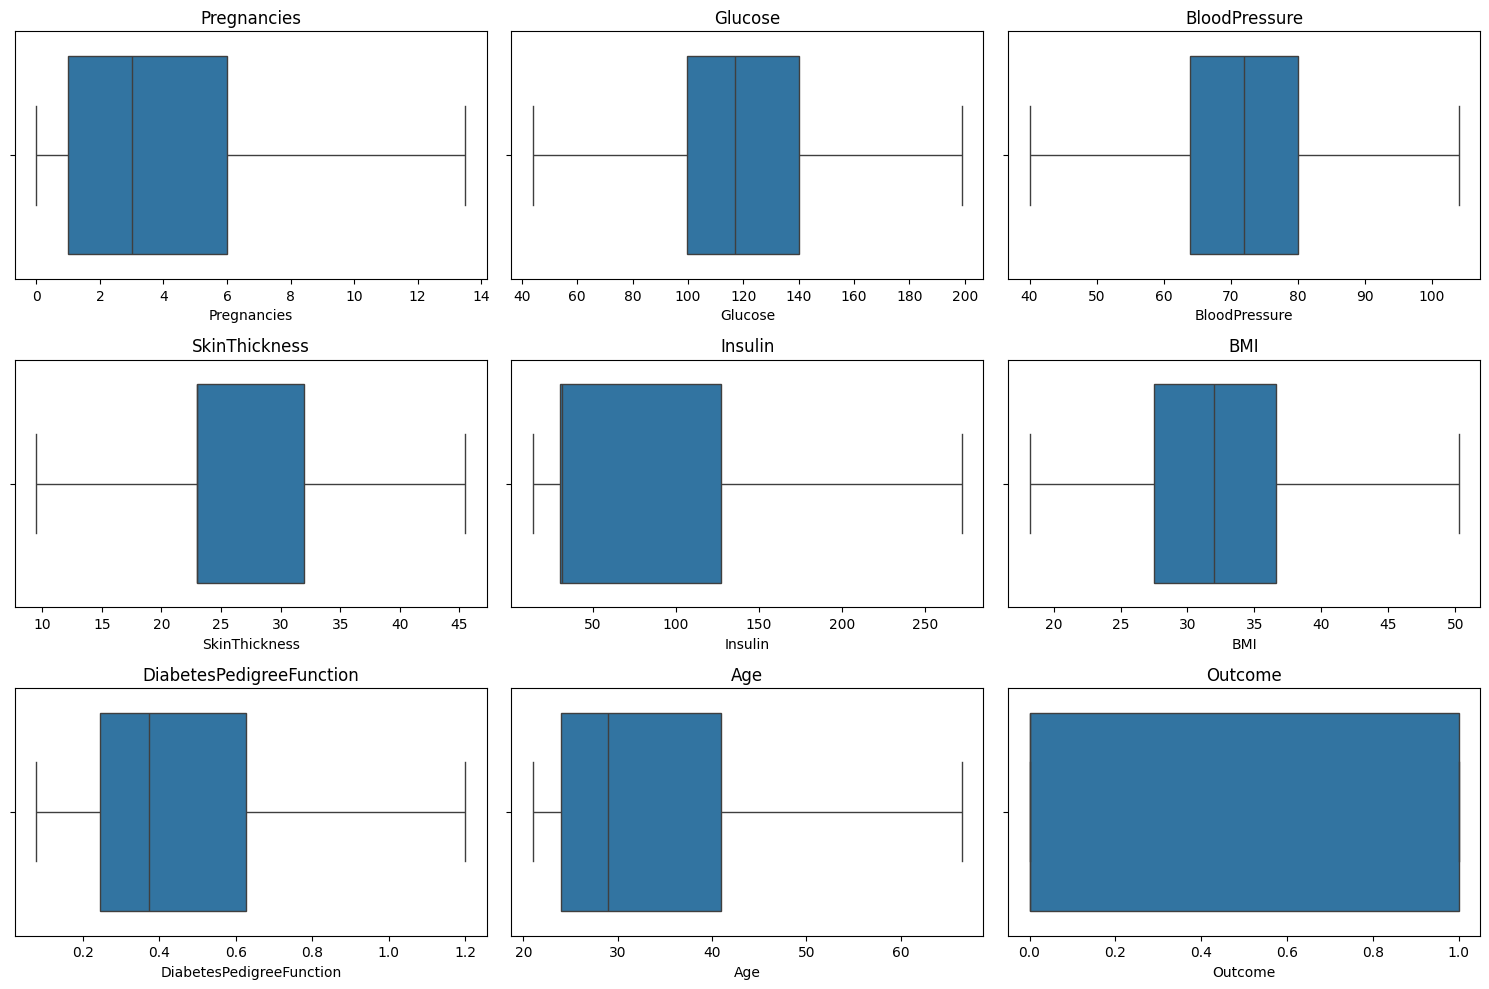

In [45]:
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (data):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

### Matriz de correlación

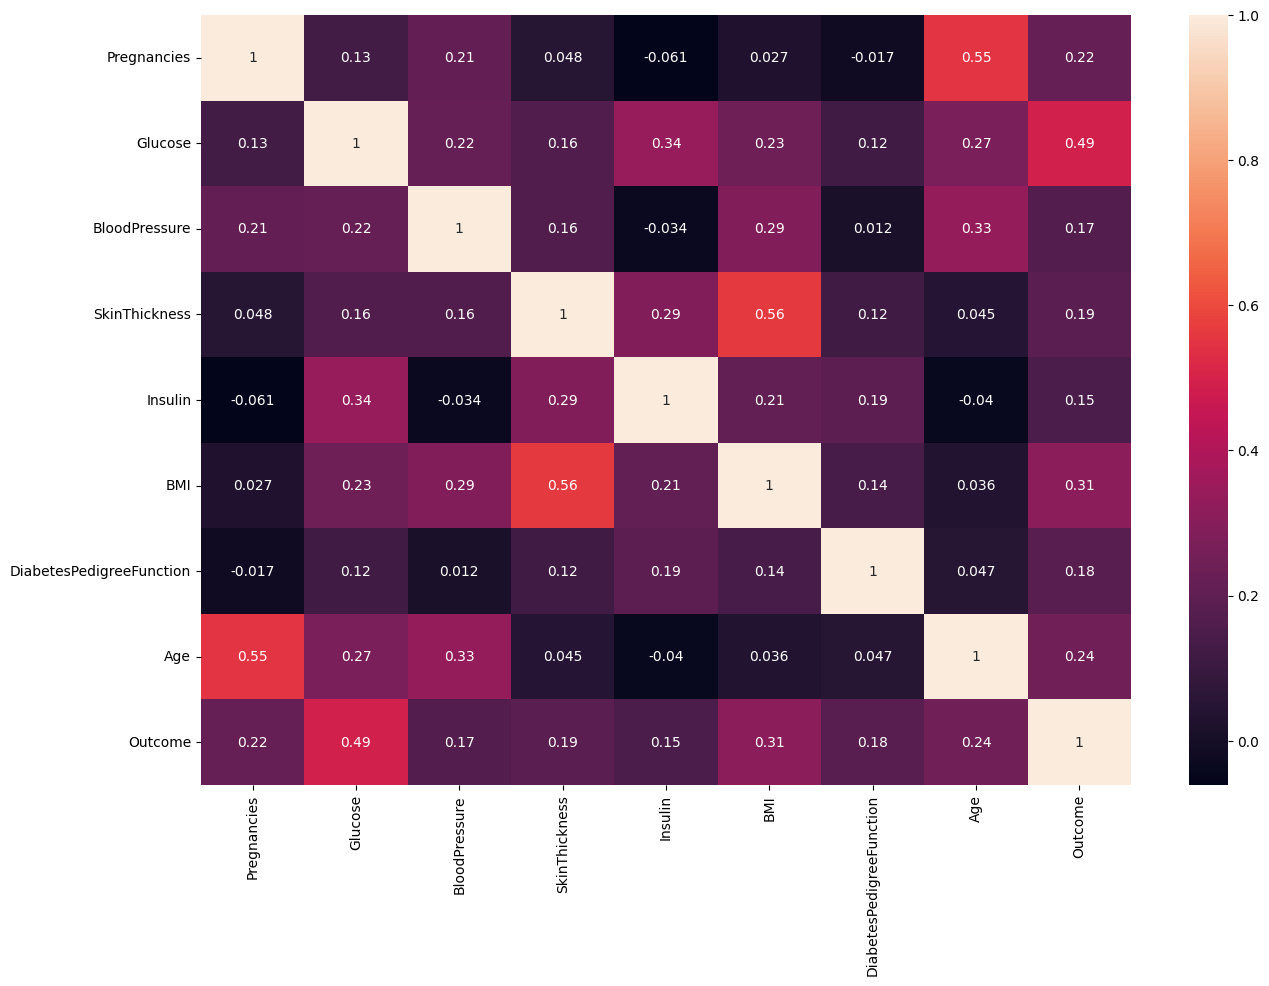

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),fmt='.2g',annot=True)
plt.show()

### Análisis de regresión

- Establecer cual es la variable explicada (Y) y cuales son las explicatorias (X)

**Variables**:

**Explicada (Y)**: 
- Resultado (Diabetes o no diabetes)

**Explicatorias (X)**: 
- Embarazos: Número de veces que está embarazada
- Glucosa
- Presión arterial
- Grosor de la piel
- Insulina
- IMC
- DiabetesPedigreeFunction
- Edad

In [47]:
## Variables explicatorias
X = data.drop(columns=['Outcome'])#el resto
## Variable explicada
y = data['Outcome']#diagnosis

**1. Datos de entrenamiento y prueba**

In [48]:
# Dividimos nuestro dataset en datos de entrenamiento y datos de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Tamaño de los datos de entrenamiento y prueba para la variable explicativa
print('Tamaño de los datos de entrenamiento y prueba para la variable explicativa')
print(X_train.shape, X_test.shape )

# Tamaño de los datos de entrenamiento y prueba para la variable explicada
print('----------------------------------------------------------------------------')
print('Tamaño de los datos de entrenamiento y prueba para la variable explicada')
print(y_train.shape, y_test.shape)

Tamaño de los datos de entrenamiento y prueba para la variable explicativa
(614, 8) (154, 8)
----------------------------------------------------------------------------
Tamaño de los datos de entrenamiento y prueba para la variable explicada
(614,) (154,)


**2. Entrenamiento del modelo**

In [49]:
# Inicializar y entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)
print(y_test.shape,
y_pred.shape)

(154,) (154,)


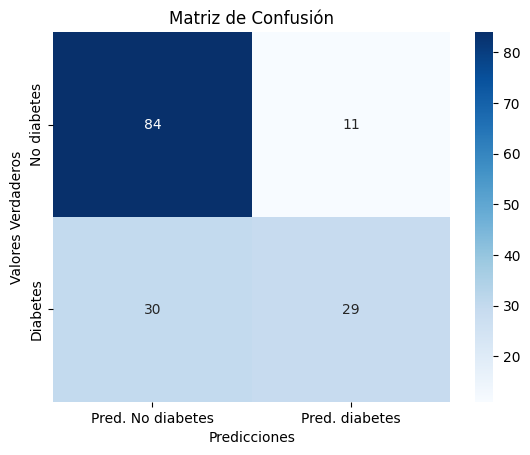

In [50]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear el heatmap
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred. No diabetes', 'Pred. diabetes'], 
            yticklabels=['No diabetes', 'Diabetes'])
# Añadir etiquetas y título
plt.xlabel('Predicciones')

plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()


### **Cálculo de métricas de evaluación**
_________________________

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>

In [51]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_pred)
# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.73
Precisión: 0.72
Recall: 0.49
F1-score: 0.59
